In [1]:
# A lot of code here is simplified and sourced from https://nextjournal.com/gkoehler/digit-recognition-with-keras

In [2]:
%matplotlib inline
# %matplotlib ipympl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=8,8

import numpy as np
from keras.utils import np_utils

In [3]:
from keras.datasets import mnist

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation

import tensorflow as tf

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

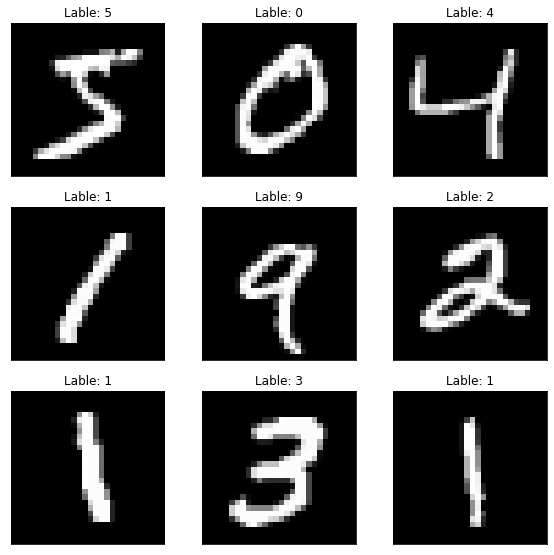

In [5]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Lable: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# Reshape into input vector instead of input matrix

X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_train_flat.shape

(60000, 784)

In [9]:
# 255 Channels so a range of 255 for black to white
np.amax(X_train) - np.amin(X_train)

255.0

In [10]:
# We normalise to get x between 0 and 1
X_train_norm = X_train_flat / 255
X_test_norm = X_test_flat / 255
np.amax(X_train_norm) - np.amin(X_train_norm)

1.0

Text(0, 0.5, 'Density')

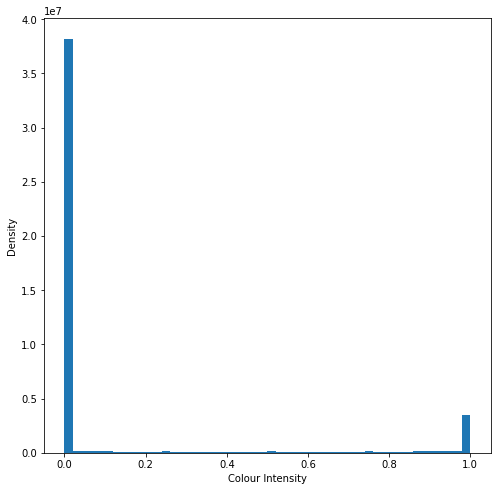

In [11]:
# Distribution of Pixel Values
plt.hist(X_train_norm.flatten(), bins = (50))
plt.xlabel('Colour Intensity')
plt.ylabel('Density')

In [12]:
# Training values into catogories

n_classes = 10
print(y_train[2])
y_train_norm = np_utils.to_categorical(y_train, n_classes)
y_test_norm = np_utils.to_categorical(y_test, n_classes)
print(y_train_norm[2])
print([0,1,2,3,4,5,6,7,8,9])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [23]:
model = Sequential()

# We specify we expect 784 input nodes (the number of pixels)
# Add a 5 node hidden layer
model.add(Dense(30, activation="relu", input_shape=(784,), name="1"))

# Convert from 10 numbers into relative probability (So total probability of each digit = 1)
model.add(Dense(10, activation="softmax", name="classification"))

In [24]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
history = model.fit(X_train_norm, y_train_norm,
          batch_size=64, epochs=10,
          verbose=2,
          validation_data=(X_test_norm, y_test_norm))

Epoch 1/10
938/938 - 3s - loss: 0.4196 - accuracy: 0.8845 - val_loss: 0.2544 - val_accuracy: 0.9255
Epoch 2/10
938/938 - 3s - loss: 0.2257 - accuracy: 0.9352 - val_loss: 0.2022 - val_accuracy: 0.9413
Epoch 3/10
938/938 - 3s - loss: 0.1884 - accuracy: 0.9461 - val_loss: 0.1787 - val_accuracy: 0.9474
Epoch 4/10
938/938 - 2s - loss: 0.1640 - accuracy: 0.9521 - val_loss: 0.1619 - val_accuracy: 0.9526
Epoch 5/10
938/938 - 3s - loss: 0.1463 - accuracy: 0.9578 - val_loss: 0.1545 - val_accuracy: 0.9533
Epoch 6/10
938/938 - 2s - loss: 0.1329 - accuracy: 0.9607 - val_loss: 0.1405 - val_accuracy: 0.9574
Epoch 7/10
938/938 - 2s - loss: 0.1211 - accuracy: 0.9646 - val_loss: 0.1331 - val_accuracy: 0.9601
Epoch 8/10
938/938 - 2s - loss: 0.1115 - accuracy: 0.9671 - val_loss: 0.1271 - val_accuracy: 0.9631
Epoch 9/10
938/938 - 2s - loss: 0.1040 - accuracy: 0.9695 - val_loss: 0.1339 - val_accuracy: 0.9595
Epoch 10/10
938/938 - 2s - loss: 0.0963 - accuracy: 0.9718 - val_loss: 0.1254 - val_accuracy: 0.9646

In [26]:
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])

Training Loss: 0.09629301726818085
Training Accuracy: 0.9718499779701233


In [27]:
print("Test Accuracy:", model.evaluate(X_test_norm, y_test_norm)[1])

313/313 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.9646
Test Accuracy: 0.9646000266075134


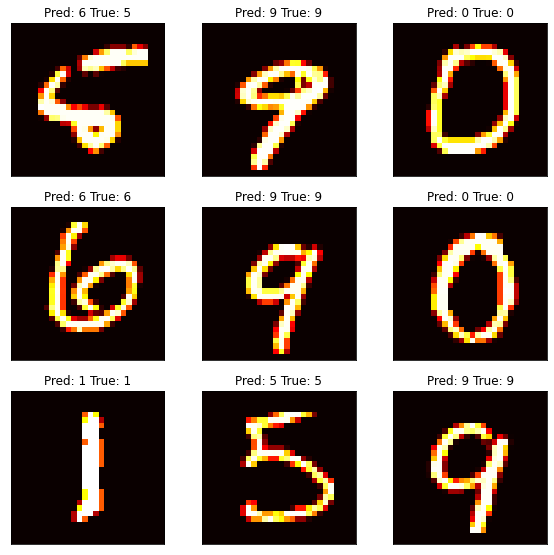

In [28]:
y_pred = model.predict(X_test_norm)


fig = plt.figure()
for i in range(8,17):
  plt.subplot(3,3,i+1 - 8)
  plt.tight_layout()
  plt.imshow(X_test[i], cmap='hot', interpolation='none')
  plt.title("Pred: {} True: {}".format(np.argmax(y_pred[i]), y_test[i]))
  plt.xticks([])
  plt.yticks([])

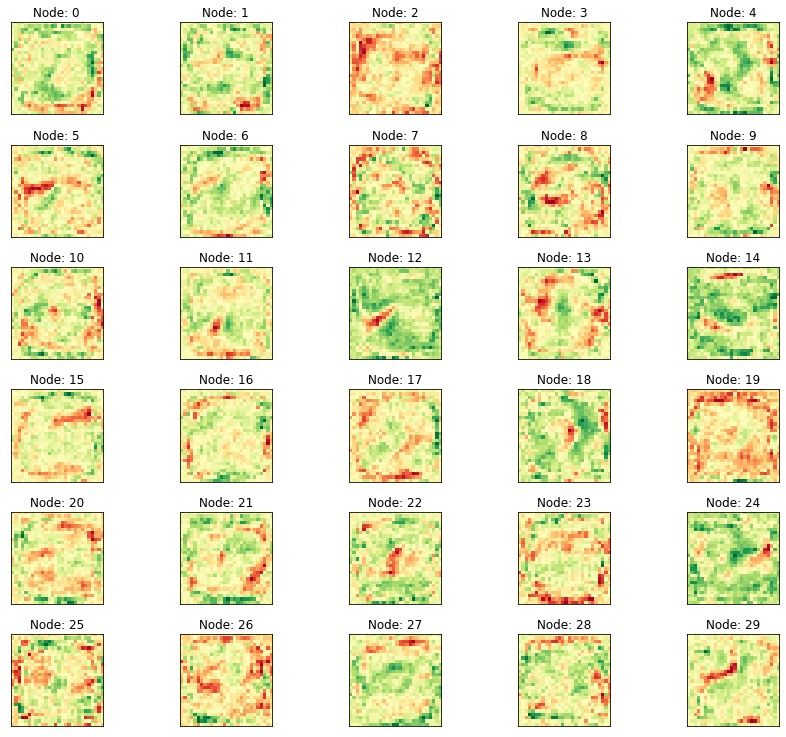

In [29]:

plt.rcParams["figure.figsize"]=12,12

activations = np.swapaxes(np.asarray(model.get_layer("1").get_weights()[0]), 0, 1)

fig = plt.figure()
for i in range(0,activations.shape[0]):
  plt.subplot(int(activations.shape[0]/5) + 1,5,i+1)
  plt.tight_layout()
  plt.imshow(activations[i].reshape(28,28), cmap='RdYlGn', interpolation='none')
  plt.title("Node: {}".format(i))
  plt.xticks([])
  plt.yticks([])

In [30]:

plt.rcParams["figure.figsize"]=8,8

In [31]:
activations = np.swapaxes(np.asarray(model.get_layer("classification").get_weights()[0]), 0, 1)
for digit, weights in enumerate(activations):
    print(digit, weights)

0 [ 5.00461280e-01  1.87360719e-01 -1.33513138e-01  1.87689617e-01
  5.39337754e-01 -1.10909678e-01  1.01990504e-02  2.42381439e-01
 -7.62964308e-04 -2.68148661e-01  1.73033014e-01 -5.13345778e-01
 -7.96419382e-01  5.82805388e-02 -1.06357944e+00 -8.52560773e-02
  1.09026551e-01 -5.60004950e-01  3.77492994e-01  1.16141886e-01
 -4.38055784e-01 -3.04546118e-01  4.31146085e-01 -1.99931324e-01
  7.21299872e-02 -5.24200201e-01 -4.35085326e-01  3.42565775e-01
 -2.08189249e-01 -1.46930411e-01]
1 [-0.03548197  0.44722304 -0.46403435 -0.10257289  0.00945075 -0.08843656
  0.05802732 -0.7368089  -0.34660214  0.37779358  0.09543862  0.67215466
  0.4956504   0.13417614 -0.13540043 -0.29953024 -0.79351896  0.5079683
  0.02165691 -0.45670295  0.14982241  0.04164926  0.9414489  -0.5063863
  0.6266136   0.12244062 -0.4592945  -0.02230698 -0.6853348   0.8107471 ]
2 [-0.18484363  0.16155297 -0.12655851  0.37441033  0.08857284  0.40392283
  0.17205319  0.3474567  -0.24884056 -0.3491498  -0.51412445  0.2735